In [1]:
"""
@File    :   Figure_S17_19
@Author  :   chend
@Contact :   chend@hust.edu.cn
"""
import sys
sys.path.append("../utils")
from utils import *

In [3]:
def get_ccdf_real_networks(G):
    deg = dict(G.degree())
    all_k = sorted(list(set(deg.values())))
    avks = np.mean(list(deg.values()))
    N = len(deg)
    x = []
    Pk = []
    for ki in all_k:
        c = 0
        for i in deg.keys():
            if deg[i] == ki:  
                c += 1
        if ki>0:
            x.append(ki/avks)
            Pk.append(c/N)    

    Pck = [sum(Pk[i:]) for i in range(len(Pk))]
    
    return x, Pck


def clustering_vs_degree_real_networks(G):
    clu = nx.clustering(G)
    deg = dict(G.degree())
    all_k = sorted(list(set(deg.values())))
    avks = np.mean(list(deg.values()))
    x = []
    C_k = []
    for ki in all_k:
        sc = 0
        j = 0
        for i in deg.keys():
            if deg[i] == ki:
                j = j + 1
                sc = sc + clu[i]
        # ignore the case where c(k) =  0
        if sc>0 and j>0:
            x.append(ki/avks)
            C_k.append(sc/j)
        
    return x, C_k



def k_nn_vs_degree_real_networks(G):
    av_nei_deg = nx.average_neighbor_degree(G)
    deg = dict(G.degree())
    all_k = sorted(list(set(deg.values())))
    deg_list = list(deg.values())
    avks = np.mean(deg_list)
    nom_fac = np.mean(deg_list)/np.mean(np.array(deg_list)**2)
    x = []
    nom_k_nn_k = []
    for ki in all_k:
        sc = 0
        j = 0
        for i in deg.keys():
            if deg[i] == ki:
                j = j + 1
                sc = sc + av_nei_deg[i]
        if sc>0 and j>0:
            x.append(ki/avks)
            nom_k_nn_k.append(nom_fac*sc/j)
    
    return x, nom_k_nn_k


In [4]:
nums = [r'\textbf{(a)}',r'\textbf{(b)}',r'\textbf{(c)}',r'\textbf{(d)}',r'\textbf{(e)}',\
r'\textbf{(f)}',r'\textbf{(g)}',r'\textbf{(h)}']
name = ["Proteome","Internet","Caida20071105","Words",\
"Frenchbookinter","Japanesebookinter","Youtube","Recordlabel"]

n = [4100,23748,26475,7377,9424,3177,124325,186758]
KT = [[0,1,3],[0,1,2,4],[0,1,2,3],[0,3,8,15],[0,1,2,5],[0,1,2],[0,1,4,10],[0,1,2,5]]
filepath = "./real_networks/"

### complementary cumulative degree distribution

Proteome
Internet
Caida20071105
Words
Frenchbookinter
Japanesebookinter
Youtube
Recordlabel


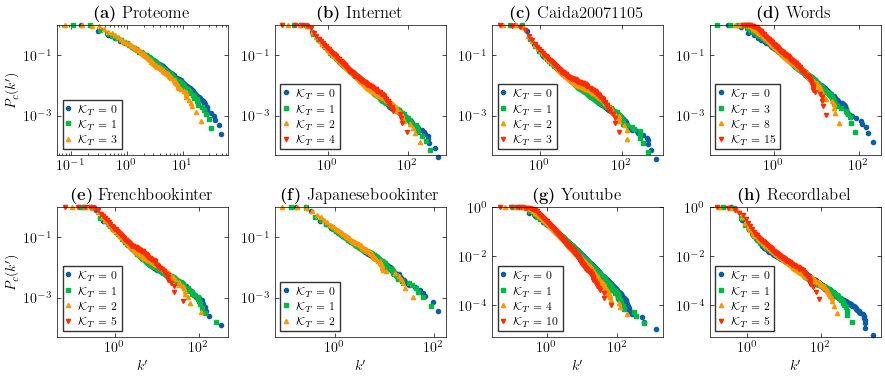

In [5]:
with plt.style.context(['science', 'scatter']):
    fig, axs = plt.subplots(2, 4, figsize=(9, 4))

    for i in range(8):
        print(name[i])
        KTi = KT[i]
        Gi = nx.read_edgelist("../real_networks/"+name[i]+".dat")
        Gi = delete_zero_degree_nodes(Gi)
        x0, y0 = get_ccdf_real_networks(Gi)

        G0 = Gi.copy()
        G1 = DTR(G0, KTi[1])
        x1, y1 = get_ccdf_real_networks(G1)

        G0 = Gi.copy()
        G2 = DTR(G0, KTi[2])
        x2, y2 = get_ccdf_real_networks(G2)

        if len(KTi)==4:
            G0 = Gi.copy()
            G3 = DTR(G0, KTi[3])
            x3, y3 = get_ccdf_real_networks(G3)

        ax = axs[i//4, i%4]
        ax.plot(x0, y0, clip_on=False, label="$\mathcal{K}_T =$ "+str(KTi[0]))
        ax.plot(x1, y1, clip_on=False, label="$\mathcal{K}_T =$ "+str(KTi[1]))
        ax.plot(x2, y2, clip_on=False, label="$\mathcal{K}_T =$ "+str(KTi[2]))
        if len(KTi)==4:
            ax.plot(x3, y3, clip_on=False, label="$\mathcal{K}_T =$ "+str(KTi[3]))

        ax.legend(loc=3, handlelength=0.2, fontsize=8, edgecolor = "black", frameon=True, fancybox=False)
        if i>=4:
            ax.set_xlabel(r"$k'$")
        if i==0 or i==4:
            ax.set_ylabel(r"$P_c(k')$")
        ax.set_xscale("log")
        ax.set_yscale("log")
        if i<=5:
            ax.set_ylim(5e-5, 1)
        else:
            ax.set_ylim(5e-6, 1)
        ax.set_title(str(nums[i])+" "+str(name[i]))


    plt.subplots_adjust(left=0.065, bottom=0.1, right=0.98, top=0.88, wspace=0.27, hspace=0.4)
    plt.show()

### degree-dependent clustering coefficient

Proteome
Internet
Caida20071105
Words
Frenchbookinter
Japanesebookinter
Youtube
Recordlabel


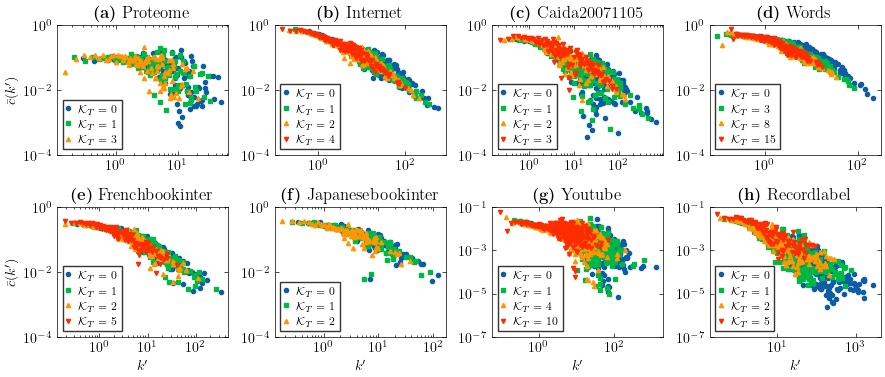

In [6]:
with plt.style.context(['science', 'scatter']):
    fig, axs = plt.subplots(2, 4, figsize=(9, 4))

    for i in range(8):
        print(name[i])
        KTi = KT[i]
        Gi = nx.read_edgelist("../real_networks/"+name[i]+".dat")
        Gi = delete_zero_degree_nodes(Gi)
        x0, y0 = clustering_vs_degree_real_networks(Gi)

        G0 = Gi.copy()
        G1 = DTR(G0, KTi[1])
        x1, y1 = clustering_vs_degree_real_networks(G1)

        G0 = Gi.copy()
        G2 = DTR(G0, KTi[2])
        x2, y2 = clustering_vs_degree_real_networks(G2)

        if len(KTi)==4:
            G0 = Gi.copy()
            G3 = DTR(G0, KTi[3])
            x3, y3 = clustering_vs_degree_real_networks(G3)

        ax = axs[i//4, i%4]
        ax.plot(x0, y0, clip_on=False, label="$\mathcal{K}_T =$ "+str(KTi[0]))
        ax.plot(x1, y1, clip_on=False, label="$\mathcal{K}_T =$ "+str(KTi[1]))
        ax.plot(x2, y2, clip_on=False, label="$\mathcal{K}_T =$ "+str(KTi[2]))
        if len(KTi)==4:
            ax.plot(x3, y3, clip_on=False, label="$\mathcal{K}_T =$ "+str(KTi[3]))

        ax.legend(loc=3, handlelength=0.2, fontsize=8, edgecolor = "black", frameon=True, fancybox=False)
        if i>=4:
            ax.set_xlabel(r"$k'$")
        if i==0 or i==4:
            ax.set_ylabel(r"$\bar c(k')$")
        ax.set_xscale("log")
        ax.set_yscale("log")
        if i<=5:
            ax.set_ylim(1e-4, 1)
        else:
            ax.set_ylim(1e-7, 1e-1)
        ax.set_title(str(nums[i])+" "+str(name[i]))


    plt.subplots_adjust(left=0.065, bottom=0.1, right=0.98, top=0.88, wspace=0.27, hspace=0.4)
    plt.show()

### degree-degree correlations

Proteome
Internet
Caida20071105
Words
Frenchbookinter
Japanesebookinter
Youtube
Recordlabel


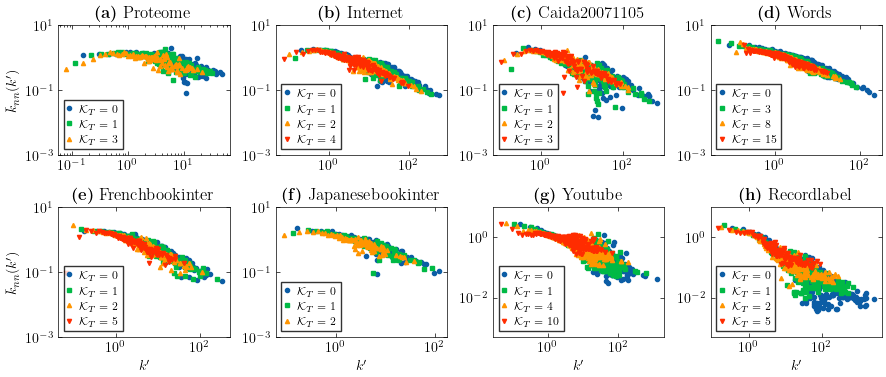

In [7]:
with plt.style.context(['science', 'scatter']):
    fig, axs = plt.subplots(2, 4, figsize=(9, 4))

    for i in range(8):
        print(name[i])
        KTi = KT[i]
        Gi = nx.read_edgelist("../real_networks/"+name[i]+".dat")
        Gi = delete_zero_degree_nodes(Gi)
        x0, y0 = k_nn_vs_degree_real_networks(Gi)

        G0 = Gi.copy()
        G1 = DTR(G0, KTi[1])
        x1, y1 = k_nn_vs_degree_real_networks(G1)

        G0 = Gi.copy()
        G2 = DTR(G0, KTi[2])
        x2, y2 = k_nn_vs_degree_real_networks(G2)

        if len(KTi)==4:
            G0 = Gi.copy()
            G3 = DTR(G0, KTi[3])
            x3, y3 = k_nn_vs_degree_real_networks(G3)

        ax = axs[i//4, i%4]
        ax.plot(x0, y0, clip_on=False, label="$\mathcal{K}_T =$ "+str(KTi[0]))
        ax.plot(x1, y1, clip_on=False, label="$\mathcal{K}_T =$ "+str(KTi[1]))
        ax.plot(x2, y2, clip_on=False, label="$\mathcal{K}_T =$ "+str(KTi[2]))
        if len(KTi)==4:
            ax.plot(x3, y3, clip_on=False, label="$\mathcal{K}_T =$ "+str(KTi[3]))

        ax.legend(loc=3, handlelength=0.2, fontsize=8, edgecolor = "black", frameon=True, fancybox=False)
        if i>=4:
            ax.set_xlabel(r"$k'$")
        if i==0 or i==4:
            ax.set_ylabel(r"$\bar k_{nn}(k')$")
        ax.set_xscale("log")
        ax.set_yscale("log")
        if i<=5:
            ax.set_ylim(1e-3, 1e1)
        else:
            ax.set_ylim(5e-4, 1e1)
        ax.set_title(str(nums[i])+" "+str(name[i]))


    plt.subplots_adjust(left=0.065, bottom=0.1, right=0.98, top=0.88, wspace=0.27, hspace=0.4)
    plt.show()